In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [6]:
df=pd.read_csv('flying-etiquette.csv')
display(df)

,RespondentID,How often do you travel by plane?,Do you ever recline your seat when you fly?,How tall are you?,Do you have any children under 18?,"In a row of three seats, who should get to use the two arm rests?","In a row of two seats, who should get to use the middle arm rest?",Who should have control over the window shade?,Is itrude to move to an unsold seat on a plane?,"Generally speaking, is it rude to say more than a few words tothe stranger sitting next to you on a plane?",...,Is itrude to wake a passenger up if you are trying to walk around?,"In general, is itrude to bring a baby on a plane?","In general, is it rude to knowingly bring unruly children on a plane?",Have you ever used personal electronics during take off or landing in violation of a flight attendant's direction?,Have you ever smoked a cigarette in an airplane bathroom when it was against the rules?,Gender,Age,Household Income,Education,Location (Census Region)
0,3436139758,Once a year or less,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,3434278696,Once a year or less,About half the time,"6'3""",Yes,The arm rests should be shared,The arm rests should be shared,Everyone in the row should have some say,"No, not rude at all","No, not at all rude",...,"No, not at all rude","No, not at all rude","No, not at all rude",No,No,Male,30-44,NaN,Graduate degree,Pacific
2,3434275578,Once a year or less,Usually,"5'8""",No,Whoever puts their arm on the arm rest first,The arm rests should be shared,The person in the window seat should have excl...,"No, not rude at all","No, not at all rude",...,"Yes, somewhat rude","Yes, somewhat rude","Yes, very rude",No,No,Male,30-44,"$100,000 - $149,999",Bachelor degree,Pacific
3,3434268208,Once a year or less,Always,"5'11""",No,The arm rests should be shared,The arm rests should be shared,Everyone in the row should have some say,"No, not rude at all","No, not at all rude",...,"Yes, somewhat rude","Yes, somewhat rude","Yes, very rude",No,No,Male,30-44,"$0 - $24,999",Bachelor degree,Pacific
4,3434250245,Once a month or less,About half the time,"5'7""",No,The person in the middle seat gets both arm rests,The person in aisle,Everyone in the row should have some say,"No, not rude at all","No, not at all rude",...,"Yes, somewhat rude","Yes, somewhat rude","Yes, very rude",Yes,No,Male,30-44,"$50,000 - $99,999",Bachelor degree,Pacific
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1035,3431732652,Once a year or less,Once in a while,"5'7""",No,Other (please specify),Other (please specify),Everyone in the row should have some say,"No, not rude at all","No, not at all rude",...,"No, not at all rude","Yes, somewhat rude","Yes, very rude",No,No,Male,30-44,"$0 - $24,999",Some college or Associate degree,East North Central
1036,3431731770,Never,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,Male,45-60,150000,Bachelor degree,Pacific
1037,3431731485,Never,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,Female,> 60,NaN,Some college or Associate degree,East North Central
1038,3431731196,Never,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,Female,30-44,"$50,000 - $99,999",Bachelor degree,New England


In [7]:
df.isnull().count()

RespondentID                                                                                                                                1040
How often do you travel by plane?                                                                                                           1040
Do you ever recline your seat when you fly?                                                                                                 1040
How tall are you?                                                                                                                           1040
Do you have any children under 18?                                                                                                          1040
In a row of three seats, who should get to use the two arm rests?                                                                           1040
In a row of two seats, who should get to use the middle arm rest?                                                                 

In [29]:
nonull_df=df.dropna()

In [30]:
nonull_df.count()

RespondentID                                                                                                                                687
How often do you travel by plane?                                                                                                           687
Do you ever recline your seat when you fly?                                                                                                 687
How tall are you?                                                                                                                           687
Do you have any children under 18?                                                                                                          687
In a row of three seats, who should get to use the two arm rests?                                                                           687
In a row of two seats, who should get to use the middle arm rest?                                                                       

In [31]:
print(nonull_df.duplicated())

2       False
3       False
4       False
5       False
6       False
        ...  
1028    False
1032    False
1034    False
1035    False
1039    False
Length: 687, dtype: bool


In [32]:
nodup_df=nonull_df.drop_duplicates()

In [33]:
nodup_df.count()

RespondentID                                                                                                                                687
How often do you travel by plane?                                                                                                           687
Do you ever recline your seat when you fly?                                                                                                 687
How tall are you?                                                                                                                           687
Do you have any children under 18?                                                                                                          687
In a row of three seats, who should get to use the two arm rests?                                                                           687
In a row of two seats, who should get to use the middle arm rest?                                                                       

In [34]:
nodup_df["How tall are you?"].value_counts()

How tall are you?
5'7"           62
5'6"           61
5'8"           60
5'5"           60
5'10"          59
5'4"           59
5'9"           56
6'0"           48
5'11"          44
5'3"           36
5'2"           34
6'1"           23
6'2"           21
6'3"           13
5'1"           13
5'0"           12
6'4"           11
Under 5 ft.    10
6'5"            5
Name: count, dtype: int64

In [35]:
nodup_df["How tall are you?"]=nodup_df["How tall are you?"].replace("Under 5 ft.","5'0\"") 

In [44]:
nodup_df["How tall are you?"].value_counts()

How tall are you?
5'7"     62
5'6"     61
5'8"     60
5'5"     60
5'10"    59
5'4"     59
5'9"     56
6'0"     48
5'11"    44
5'3"     36
5'2"     34
6'1"     23
5'0"     22
6'2"     21
6'3"     13
5'1"     13
6'4"     11
6'5"      5
Name: count, dtype: int64

In [41]:
def convertor(feetheight):
    try:
        parts=feetheight.split("'")
        
        feet=int(parts[0])
        inches=int(parts[1][:-1])
        return feet*12+inches
    except:
        return None
nodup_df["Height (Inches)"]=nodup_df["How tall are you?"].apply(convertor)

In [42]:
nodup_df["Height (Inches)"]

2       68
3       71
4       67
5       69
6       74
        ..
1028    64
1032    63
1034    73
1035    67
1039    75
Name: Height (Inches), Length: 687, dtype: int64

In [53]:
column_mapping = {
    'RespondentID': 'ID',
    'How often do you travel by plane?': 'Travel frequency',
    'Do you ever recline your seat when you fly?': 'Seat recline behavior',
    'How tall are you?': 'Height',
    'Do you have any children under 18?': 'Children under 18',
    'In a row of three seats, who should get to use the two arm rests?': 'Arm rests in row of three',
    'In a row of two seats, who should get to use the middle arm rest?': 'Middle arm rest in row of two',
    'Who should have control over the window shade?': 'Window shade control',
    'Is itrude to move to an unsold seat on a plane?': 'Moving to unsold seat etiquette',
    'Generally speaking, is it rude to say more than a few words tothe stranger sitting next to you on a plane?': 'Talking to stranger etiquette',
    'On a 6 hour flight from NYC to LA, how many times is it acceptable to get up if you\'re not in an aisle seat?': 'Number of bathroom breaks',
    'Under normal circumstances, does a person who reclines their seat during a flight have any obligation to the person sitting behind them?': 'Obligation to person behind when reclining',
    'Is it rude to recline your seat on a plane?': 'Seat recline etiquette',
    'Given the opportunity, would you eliminate the possibility of reclining seats on planes entirely?': 'Opinion on reclining seats elimination',
    'Is it rude to ask someone to switch seats with you in order to be closer to friends?': 'Asking to switch seats for friends etiquette',
    'Is it rude to ask someone to switch seats with you in order to be closer to family?': 'Asking to switch seats for family etiquette',
    'Is it rude to wake a passenger up if you are trying to go to the bathroom?': 'Waking passenger for bathroom etiquette',
    'Is it rude to wake a passenger up if you are trying to walk around?': 'Waking passenger to walk around etiquette',
    'In general, is itrude to bring a baby on a plane?': 'Bringing baby on plane etiquette',
    'In general, is it rude to knowingly bring unruly children on a plane?': 'Bringing unruly children on plane etiquette',
    'Have you ever used personal electronics during take off or landing in violation of a flight attendant\'s direction?': 'Use of personal electronics violation',
    'Have you ever smoked a cigarette in an airplane bathroom when it was against the rules?': 'Smoking in airplane bathroom violation',
    'Gender': 'Gender',
    'Age': 'Age',
    'Household Income': 'Household Income',
    'Education': 'Education',
    'Location (Census Region)': 'Location (Census Region)'
}

nodup_df.rename(columns=column_mapping, inplace=True)

In [54]:
print(nodup_df)

              ID       Travel frequency Seat recline behavior Height  \
2     3434275578    Once a year or less               Usually   5'8"   
3     3434268208    Once a year or less                Always  5'11"   
4     3434250245   Once a month or less   About half the time   5'7"   
5     3434245875    Once a year or less               Usually   5'9"   
6     3434235351   Once a month or less       Once in a while   6'2"   
...          ...                    ...                   ...    ...   
1028  3431737008    Once a year or less                 Never   5'4"   
1032  3431735911    Once a year or less                Always   5'3"   
1034  3431734398  A few times per month       Once in a while   6'1"   
1035  3431732652    Once a year or less       Once in a while   5'7"   
1039  3431729581    Once a year or less       Once in a while   6'3"   

     Children under 18                          Arm rests in row of three  \
2                   No       Whoever puts their arm on the

In [55]:
display(nodup_df)

,ID,Travel frequency,Seat recline behavior,Height,Children under 18,Arm rests in row of three,Middle arm rest in row of two,Window shade control,Moving to unsold seat etiquette,Talking to stranger etiquette,...,Bringing baby on plane etiquette,Bringing unruly children on plane etiquette,Use of personal electronics violation,Smoking in airplane bathroom violation,Gender,Age,Household Income,Education,Location (Census Region),Height (Inches)
2,3434275578,Once a year or less,Usually,"5'8""",No,Whoever puts their arm on the arm rest first,The arm rests should be shared,The person in the window seat should have excl...,"No, not rude at all","No, not at all rude",...,"Yes, somewhat rude","Yes, very rude",No,No,Male,30-44,"$100,000 - $149,999",Bachelor degree,Pacific,68
3,3434268208,Once a year or less,Always,"5'11""",No,The arm rests should be shared,The arm rests should be shared,Everyone in the row should have some say,"No, not rude at all","No, not at all rude",...,"Yes, somewhat rude","Yes, very rude",No,No,Male,30-44,"$0 - $24,999",Bachelor degree,Pacific,71
4,3434250245,Once a month or less,About half the time,"5'7""",No,The person in the middle seat gets both arm rests,The person in aisle,Everyone in the row should have some say,"No, not rude at all","No, not at all rude",...,"Yes, somewhat rude","Yes, very rude",Yes,No,Male,30-44,"$50,000 - $99,999",Bachelor degree,Pacific,67
5,3434245875,Once a year or less,Usually,"5'9""",Yes,Whoever puts their arm on the arm rest first,Whoever puts their arm on the arm rest first,The person in the window seat should have excl...,"Yes, somewhat rude","No, not at all rude",...,"Yes, very rude","Yes, very rude",No,No,Male,30-44,"$25,000 - $49,999",Graduate degree,East North Central,69
6,3434235351,Once a month or less,Once in a while,"6'2""",Yes,The person in the middle seat gets both arm rests,Whoever puts their arm on the arm rest first,Everyone in the row should have some say,"No, not rude at all","Yes, somewhat rude",...,"No, not at all rude","Yes, somewhat rude",No,No,Male,30-44,150000,Some college or Associate degree,Pacific,74
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1028,3431737008,Once a year or less,Never,"5'4""",No,The arm rests should be shared,The arm rests should be shared,Everyone in the row should have some say,"No, not rude at all","Yes, somewhat rude",...,"No, not at all rude","Yes, somewhat rude",No,No,Female,> 60,"$50,000 - $99,999",Graduate degree,West North Central,64
1032,3431735911,Once a year or less,Always,"5'3""",No,Whoever puts their arm on the arm rest first,Whoever puts their arm on the arm rest first,The person in the window seat should have excl...,"No, not rude at all","No, not at all rude",...,"Yes, very rude","Yes, very rude",Yes,No,Female,30-44,150000,High school degree,Middle Atlantic,63
1034,3431734398,A few times per month,Once in a while,"6'1""",Yes,The person in the middle seat gets both arm rests,Other (please specify),Everyone in the row should have some say,"No, not rude at all","Yes, somewhat rude",...,"Yes, somewhat rude","Yes, somewhat rude",No,No,Male,30-44,150000,Graduate degree,Pacific,73
1035,3431732652,Once a year or less,Once in a while,"5'7""",No,Other (please specify),Other (please specify),Everyone in the row should have some say,"No, not rude at all","No, not at all rude",...,"Yes, somewhat rude","Yes, very rude",No,No,Male,30-44,"$0 - $24,999",Some college or Associate degree,East North Central,67


In [57]:
nodup_df['Asking to switch seats for friends etiquette'].value_counts()

Asking to switch seats for friends etiquette
No, not at all rude    519
Yes, somewhat rude     142
Yes, very rude          26
Name: count, dtype: int64

<Axes: ylabel='ID'>

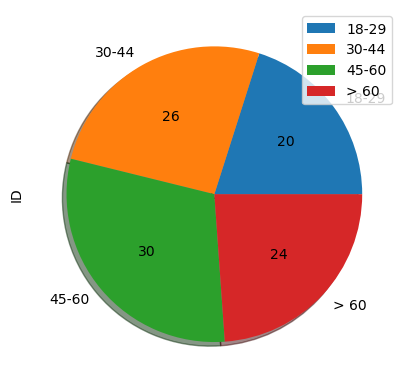

In [63]:
age_df=nodup_df.groupby('Age').count()
age_df
age_df.plot.pie(y='ID',shadow=True,autopct='%.0f')

<Axes: xlabel='Asking to switch seats for friends etiquette'>

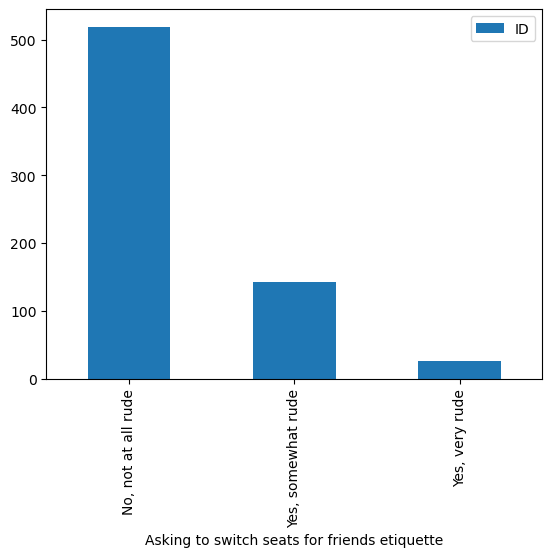

In [64]:
switch_df=nodup_df.groupby('Asking to switch seats for friends etiquette').count()
switch_df
switch_df.plot.bar(y='ID')

<Axes: xlabel='Asking to switch seats for friends etiquette'>

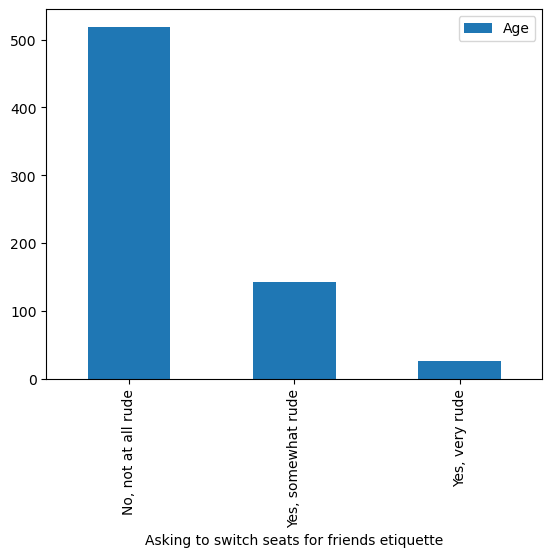

In [70]:
switch_df=nodup_df.groupby('Asking to switch seats for friends etiquette').count()
switch_df
switch_df.plot.bar(y='Age')